<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


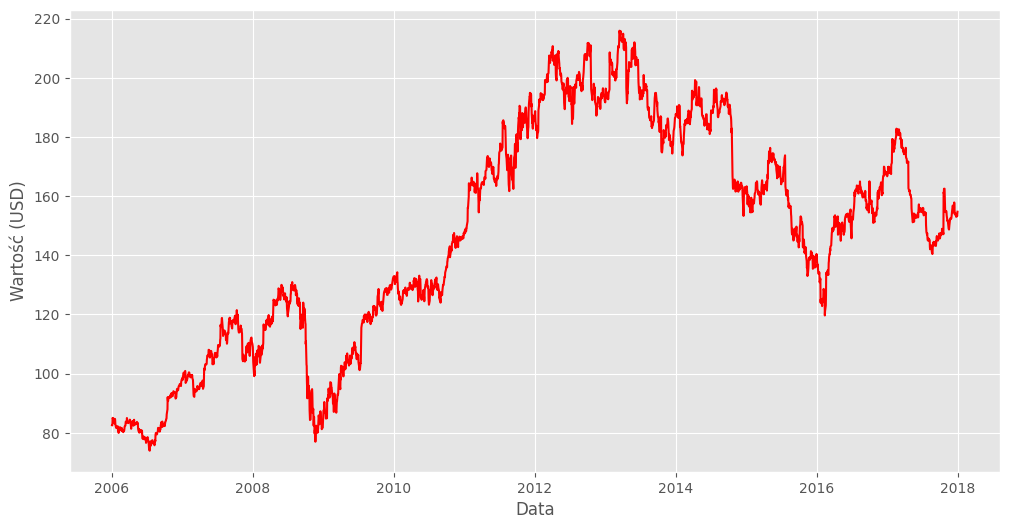

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.style.use('ggplot')

ibm = pd.read_csv(r'IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

plt.figure(figsize=(12,6))
plt.plot(ibm['High'], color='red')
plt.xlabel('Data')
plt.ylabel('Wartość (USD)')

plt.show()

text1 = "jest stacjonarny z prawdopodobieństwem wynoszącym"
text2 = "Szereg czasowy"
k1 = " stacjonarny z prawdopodobieństwem wynoszącym "
k2 = " Szereg czasowy "

TESTOWANIE SZEREGU

In [5]:
from statsmodels.tsa.stattools import adfuller

print(" > Czy surowe dane są stacjonarne?")
dftest = adfuller(df["value"], autolag='AIC')
print("Statystyka testowa = {:.3f}".format(dftest[0]))
print("Wartości krytyczne:")

for k, v in dftest[4].items():
    print("\t{}: {:.3f} - {} {} {} {}%".format(k, round(v, 3), text2,"nie" if v < dftest[0] else "", text1, 100-int(k[:-1])))

 > Czy surowe dane są stacjonarne?
Statystyka testowa = -1.863
Wartości krytyczne:
	1%: -3.433 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 99%
	5%: -2.862 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	10%: -2.567 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 90%


In [6]:
from statsmodels.tsa.stattools import kpss

print(" > Czy surowe dane są stacjonarne?")
p = kpss(df["value"])
print("Statystyka testowa = {:.3f}".format(p[0]))
print("Wartości krytyczne:")

for k, v in p[3].items():
    print("\t{}: {:.3f} -{}{}{}{:.0f}%".format(k, round(v, 3), k2, "jest" if p[0] < v else "nie jest", k1, 100 - float(k[:-1])))

 > Czy surowe dane są stacjonarne?
Statystyka testowa = 5.451
Wartości krytyczne:
	10%: 0.347 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 90%
	5%: 0.463 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	2.5%: 0.574 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 98%
	1%: 0.739 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 99%


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


DEKOMPOZYCJA

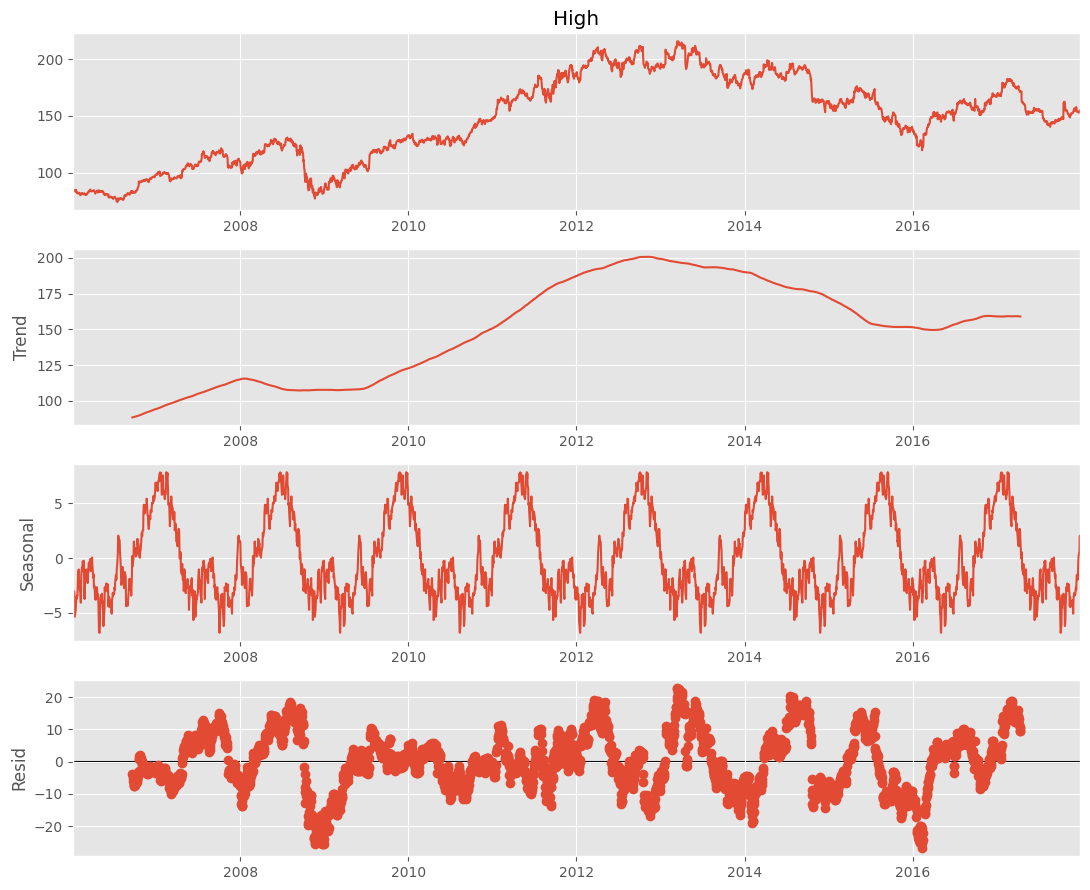

In [2]:
plt.rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["High"],period=360)
decomposed_ibm_volume.plot()
plt.show();

RÓZNICOWANIE  + DEKOMPOZYCJA

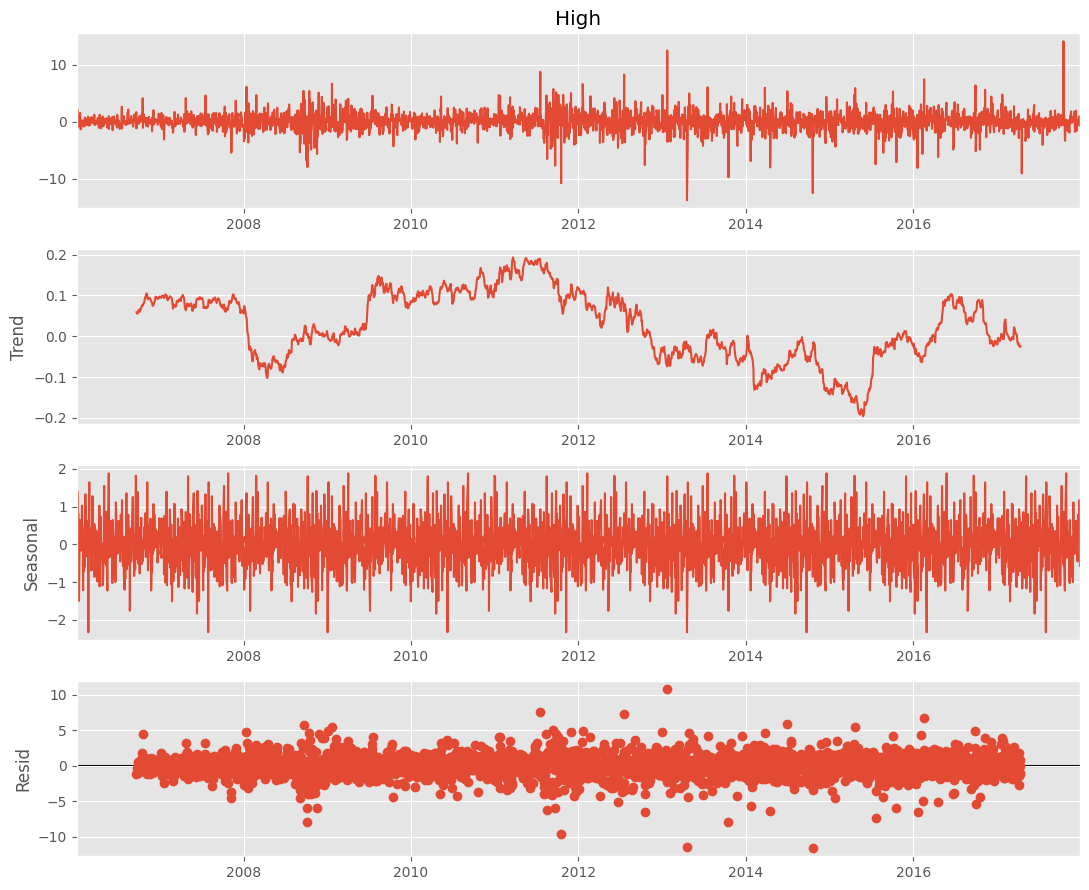

In [17]:
plt.rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["High"].diff()[1:],period=360)
decomposed_ibm_volume.plot()
plt.show();

WYGŁADZANIE W CAŁOŚCI

Przed wygładzaniem:
0        82.55
1        82.50
2        82.90
3        85.03
4        84.25
         ...  
3015    153.00
3016    153.86
3017    153.18
3018    154.12
3019    154.72
Name: value, Length: 3020, dtype: float64

Po wygładzaniu:
0        82.550000
1        82.522222
2        82.677049
3        83.474119
4        83.704926
           ...    
3015    154.157343
3016    154.097874
3017    153.914299
3018    153.955440
3019    154.108352
Name: ewma, Length: 3020, dtype: float64


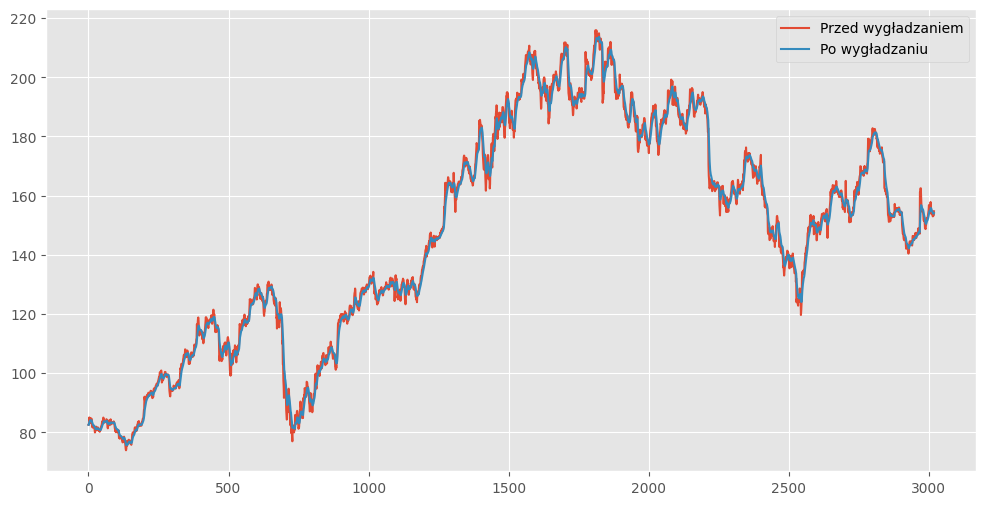

In [3]:
#Wygładzanie
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

data = np.array(ibm["High"])
df = pd.DataFrame(data, columns=['value'])
df['ewma'] = df['value'].ewm(alpha=0.2).mean()
print("Przed wygładzaniem:")
print(df['value'])
print("\nPo wygładzaniu:")
print(df['ewma'])
wysokosc = 6
szerokosc = 12
plt.figure(figsize=(szerokosc, wysokosc))
plt.plot(df['value'], label='Przed wygładzaniem')
plt.plot(df['ewma'], label='Po wygładzaniu')
plt.legend()
plt.show()

WYGŁADZONE + ZOOM/POWIEKSZONE

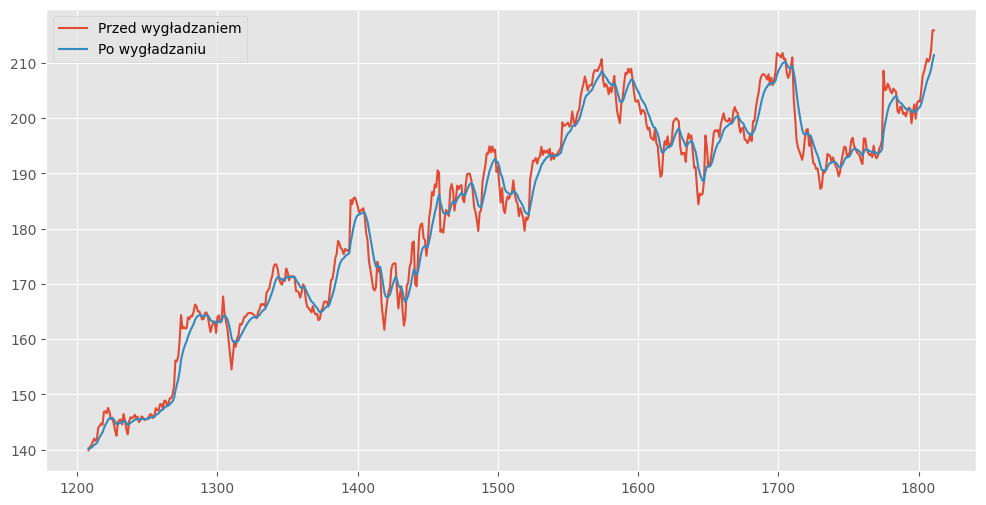

In [14]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

# przykładowe dane
#x = np.array([1, 2, 4, 8, 16, 32, 64, 128])
data = np.array(ibm["High"])

# tworzenie obiektu DataFrame z danych numpy
df = pd.DataFrame(data, columns=['value'])

# wygładzanie wykładnicze
df['ewma'] = df['value'].ewm(alpha=0.2).mean()

# obcięcie początkowej i końcowej części danych
start_index = int(len(df) * 0.4)  # obetnij 40% początkowych danych
end_index = int(len(df) * 0.6)  # obetnij 60% końcowych danych
trimmed_df = df[start_index:end_index]

# tworzenie wykresu
wysokosc = 6
szerokosc = 12
plt.figure(figsize=(szerokosc, wysokosc))

# wykres
plt.plot(trimmed_df['value'], label='Przed wygładzaniem')
plt.plot(trimmed_df['ewma'], label='Po wygładzaniu')
plt.legend()
plt.show()

WYGŁADZONY SZUM

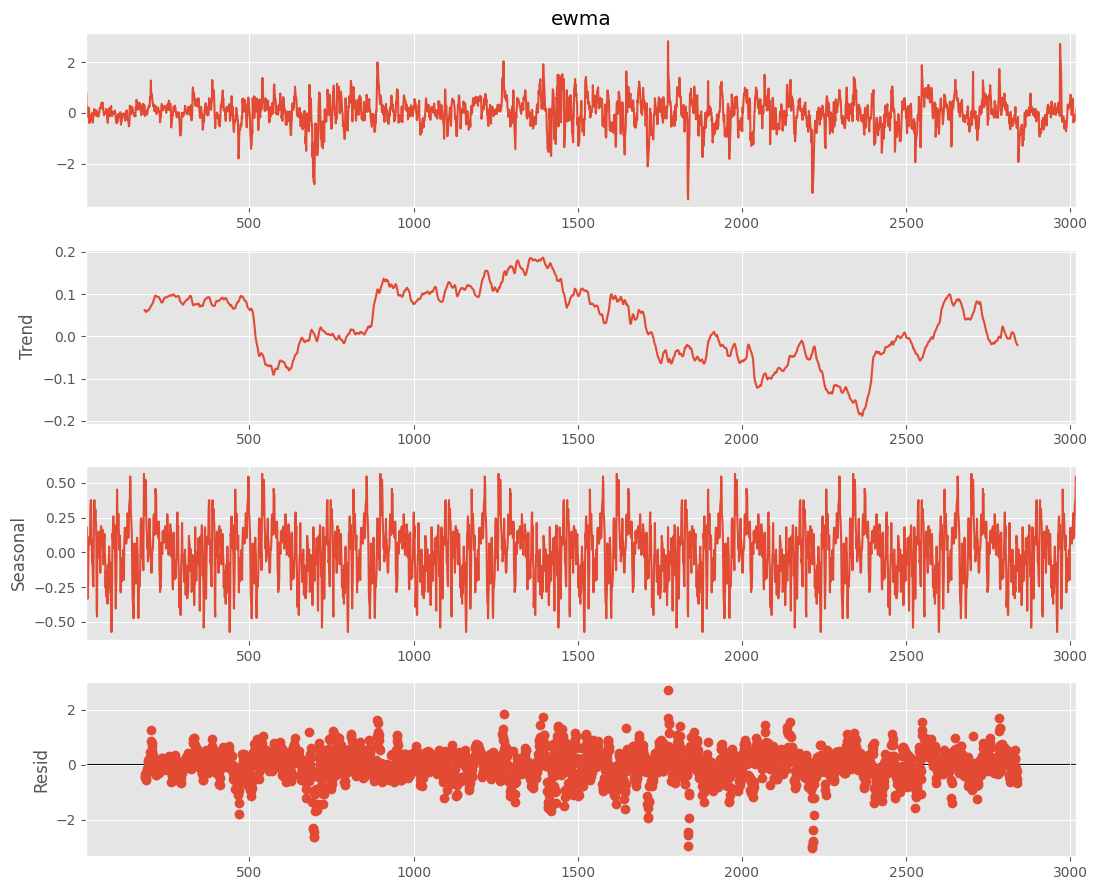

In [4]:
plt.rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(df['ewma'].diff()[1:],period=360)
decomposed_ibm_volume.plot()
plt.show();

TEST WYGŁADZONYHC I ZRÓŻNICOWANYCH DANYCH

In [8]:
from statsmodels.tsa.stattools import adfuller

print(" > Czy zróżnicowane i wygładzone dane są stacjonarne ?")
dftest = adfuller(decomp_df["observed"], autolag='AIC')
print("Statystyka testowa = {:.3f}".format(dftest[0]))
print("Wartości krytyczne:")

for k, v in dftest[4].items():
    print("\t{}: {:.3f} - {} {} {} {}%".format(k, round(v, 3), text2,"nie" if v < dftest[0] else "", text1, 100-int(k[:-1]))) 

 > Czy zróżnicowane i wygładzone dane są stacjonarne ?
Statystyka testowa = -18.265
Wartości krytyczne:
	1%: -3.433 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 99%
	5%: -2.862 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	10%: -2.567 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 90%


In [9]:
from statsmodels.tsa.stattools import kpss

print(" > Czy zróżnicowane i wygładzone dane są stacjonarne ?")
p = kpss(decomp_df["observed"])
print("Statystyka testowa = {:.3f}".format(p[0]))
print("Wartości krytyczne:")

for k, v in p[3].items():
    print("\t{}: {:.3f} -{}{}{}{:.0f}%".format(k, round(v, 3), k2, "jest" if p[0] < v else "nie jest", k1, 100 - float(k[:-1])))

 > Czy zróżnicowane i wygładzone dane są stacjonarne ?
Statystyka testowa = 0.231
Wartości krytyczne:
	10%: 0.347 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 90%
	5%: 0.463 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	2.5%: 0.574 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 98%
	1%: 0.739 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 99%


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


ACF oraz PACF

1      -0.027778
2       0.154827
3       0.797070
4       0.230807
5       0.112508
          ...   
3015   -0.289336
3016   -0.059469
3017   -0.183575
3018    0.041140
3019    0.152912
Name: observed, Length: 3019, dtype: float64


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


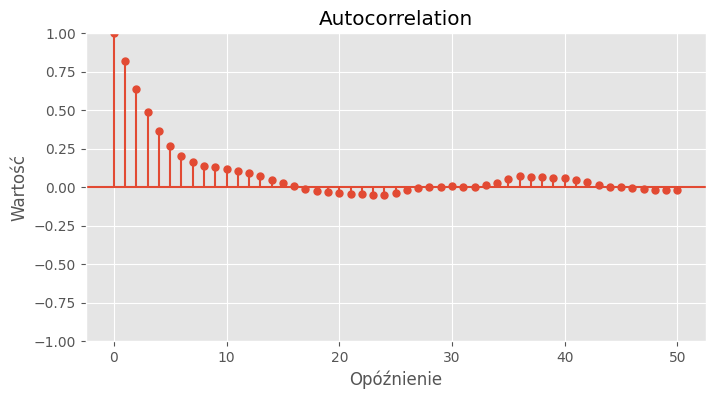

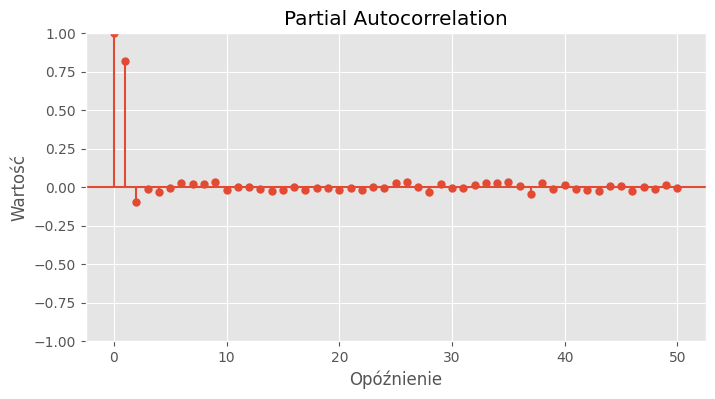

In [13]:
#DLA wygładzonego i zróznicowanego IBM
print(decomp_df["observed"])
# Wykres ACF
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(decomp_df["observed"], lags=50, ax=ax, alpha=None)
ax.set_xlabel('Opóźnienie')
ax.set_ylabel('Wartość')

# Wykres PACF
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(decomp_df["observed"], lags=50, ax=ax, alpha=None)
ax.set_xlabel('Opóźnienie')
ax.set_ylabel('Wartość')

plt.show()

POZOSTAŁE EKSPERYMENTY

C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


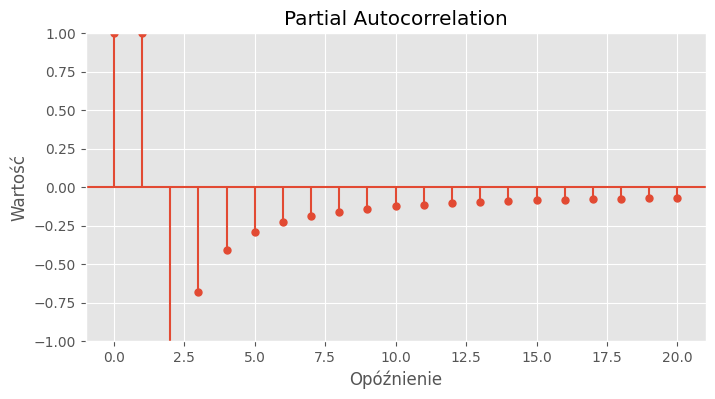

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

# Sinusoida
x = np.linspace(0, 20*np.pi/3, 300)
y = np.sin(x)

# Wygenerowanie i wyświetlenie funkcji PACF
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(y, lags=20, ax=ax,alpha=None)
ax.set_xlabel('Opóźnienie')
ax.set_ylabel('Wartość')

plt.show()

C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


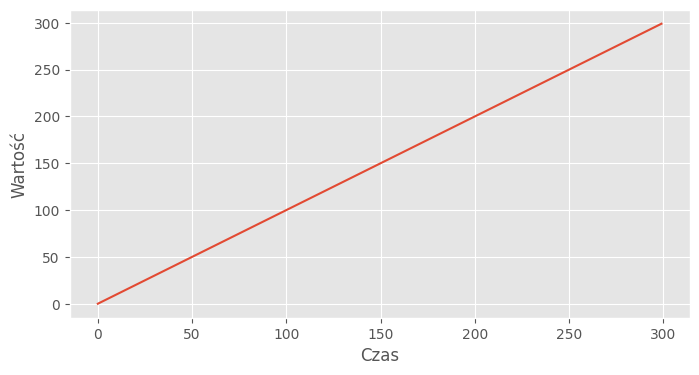

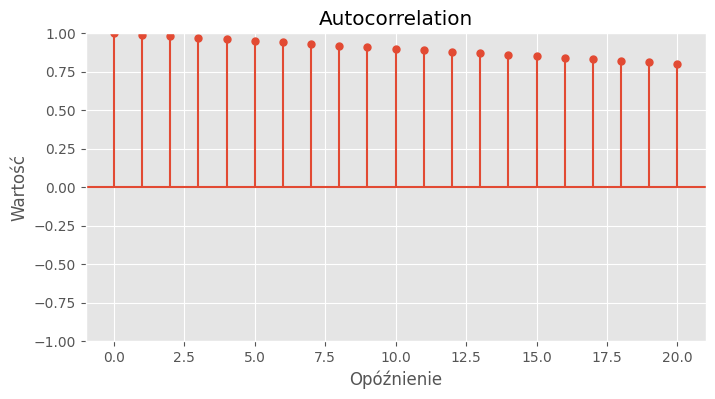

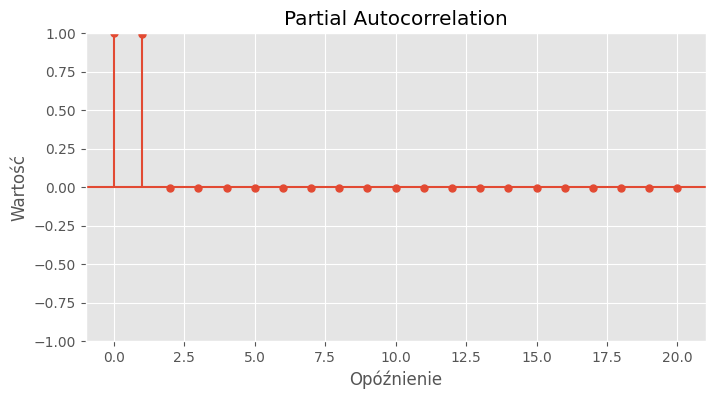

In [12]:
# Funkcja liniowa
x = np.arange(0, 300)
y = x

# Wykres funkcji liniowej
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y)
ax.set_xlabel('Czas')
ax.set_ylabel('Wartość')

# Wykres ACF
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(y, lags=20, ax=ax, alpha=None)
ax.set_xlabel('Opóźnienie')
ax.set_ylabel('Wartość')

# Wykres PACF
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(y, lags=20, ax=ax, alpha=None)
ax.set_xlabel('Opóźnienie')
ax.set_ylabel('Wartość')

plt.show()